# Analyse

In [63]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [64]:
data = pd.read_csv("results/error_29-11-24:18:52:08.csv", index_col=0)
#data = pd.read_csv("results/f1-r@k_29-11-24:18:52:08.csv", index_col=0)
data['Initial Sample'] = data['Initial Sample'].astype(str)

In [65]:
data.head()

,Runs,Initial Sample,Query Sample,Pair,Error on materialized,Error on lattice,Prediction
0,0,0.1,0.1,"('AA', 'HA')",0.333333,0.428571,0.0
1,0,0.1,0.1,"('AA', 'AS')",0.222222,0.222222,0.0
2,0,0.1,0.1,"('B6', 'DL')",0.125000,0.125000,0.0
3,0,0.1,0.1,"('B6', 'AS')",0.166667,0.166667,1.0
4,0,0.1,0.1,"('DL', 'WN')",0.200000,0.400000,1.0


In [66]:
pivot = pd.pivot_table(data, values="Error on materialized", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
#pivot = pd.pivot_table(data, values="F1 on Queries", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
pivot

Query Sample,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Initial Sample,,,,,,,,,,
0.1,0.419668,0.332126,0.291635,0.208067,0.188375,0.151430,0.116132,0.107864,0.062403,0.0
0.2,0.366458,0.320048,0.227003,0.161179,0.134174,0.131375,0.107048,0.092933,0.063630,0.0
0.3,0.441435,0.343685,0.350098,0.202944,0.187037,0.175721,0.147402,0.138866,0.079393,0.0
0.4,0.420942,0.457434,0.372529,0.236961,0.166008,0.123797,0.096483,0.079819,0.063992,0.0
0.5,0.473018,0.276062,0.266881,0.197534,0.148797,0.121821,0.109146,0.087954,0.069652,0.0
0.6,0.408153,0.332299,0.298490,0.208009,0.173318,0.139460,0.119255,0.086281,0.047462,0.0
0.7,0.409774,0.385091,0.267712,0.177387,0.124990,0.127406,0.097471,0.093763,0.069565,0.0
0.8,0.496250,0.341190,0.301946,0.229874,0.210648,0.179200,0.139779,0.107659,0.054692,0.0
0.9,0.430756,0.371576,0.288258,0.260063,0.169673,0.177258,0.151701,0.095113,0.065451,0.0


<Axes: xlabel='Query Sample', ylabel='Initial Sample'>

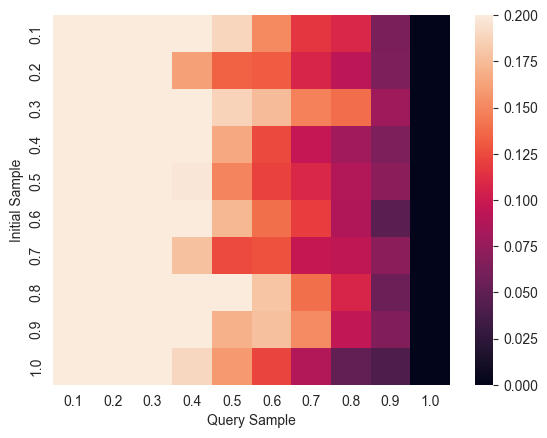

In [67]:
sns.heatmap(pivot, vmin=0, vmax=0.2)

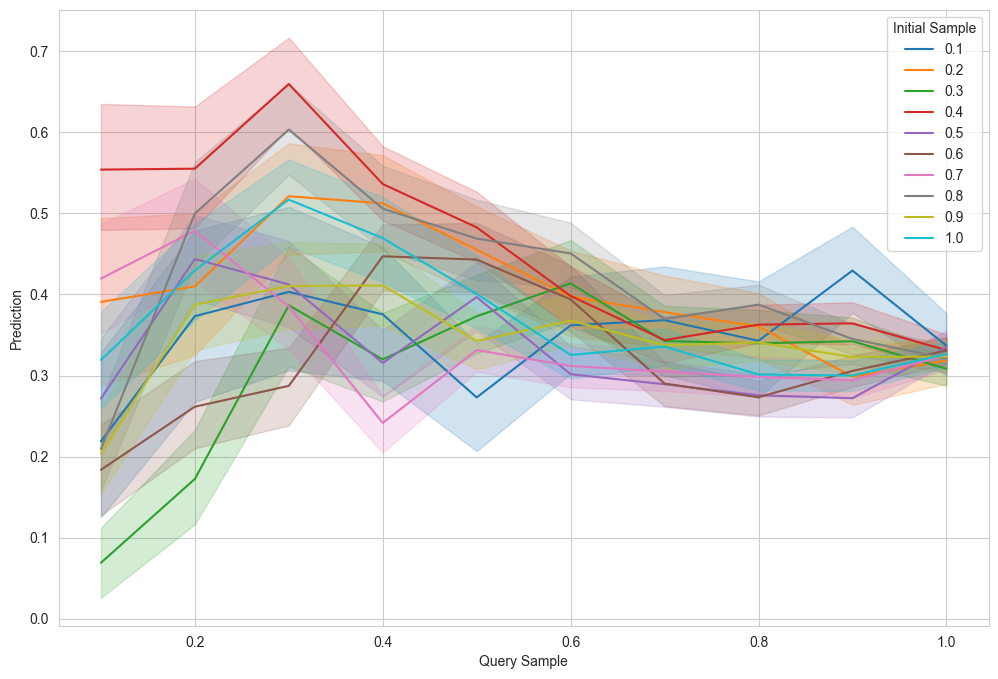

In [74]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
x="Query Sample"
y="Prediction"
hue="Initial Sample"
plot=sns.lineplot(ax=ax,data=data,x=x,y=y,hue=hue,)
#sns.boxplot(ax=ax,data=data, x="Query Sample", y="Prediction", hue="Initial Sample",)

In [75]:
save=plot.get_figure()
name="figures/test_"+y+"_"+x+"_"+hue+".png"
save.savefig(name)